In [1]:
import os
import codecs
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

import missingno as msno

Using TensorFlow backend.


In [2]:
df = pd.read_csv('new.csv', encoding='utf-8')
df.tail()

C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,도시,구시군,읍면동,단지명,전용면적(㎡),거래금액(만원),거래층,계약일,분양면적(㎡),입주일,분양일,분양가(만원),총세대수,면적별세대수,3.3㎡당가(전용면적-만원),3.3㎡당가(분양면적-만원),3.3㎡당가(분양가-만원)
803746,서울특별시,은평구,갈현동,G캐슬,61.04,"23,900",2,2018.08,82.65,2003.05,NaN,NaN,18,2,"1,294",956,NaN
803747,서울특별시,은평구,갈현동,우남,59.92,"23,800",7,2018.07,82.65,1998.07,NaN,NaN,109,48,"1,313",952,NaN
803748,서울특별시,은평구,갈현동,선구,72.73,"21,000",3,2018.07,115.70,2004.06,NaN,"22,750",19,2,955,600,650
803749,서울특별시,은평구,불광동,그린라이프,84.00,"18,900",4,2018.07,97.00,2005.03,2004.05,NaN,11,7,744,644,NaN
803750,서울특별시,은평구,갈현동,한솔,39.96,"18,000",10,2018.07,59.50,1997.12,NaN,NaN,193,57,"1,489","1,000",NaN


In [3]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)
print(df.shape)

(803751, 17)


In [4]:
# with codecs.open('hello.csv', 'r', encoding='utf-8', errors='ignore') as rowdata:
#     df = pd.read_csv(rowdata, sep="\t")

In [5]:
dataset = df.values
x = dataset[:, 4:]
df = pd.DataFrame(x)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,196.21,"450,000",13,2018.12,211.23,1976.06,NaN,NaN,480,120,"7,582","7,043",NaN
1,202.58,"450,000",5,2018.12,252.31,2010.07,2009.05,"600,000",19,1,"7,343","5,896","7,861"
2,139.83,"320,000",7,2018.12,165.29,1982.04,NaN,NaN,"1,924",168,"7,565","6,400",NaN
3,191.04,"315,000",2,2018.12,219.22,1983.12,NaN,"8,978","1,204",84,"5,451","4,750",135
4,144.2,"304,000",10,2018.12,158.68,1979.05,NaN,NaN,560,168,"6,969","6,333",NaN
5,165.43,"300,000",8,2018.12,202.2,2016.08,2014.07,"127,920",400,4,"5,995","4,905","2,091"
6,94.49,"280,000",16,2018.12,126.22,2015.09,2013.11,"118,445","1,608",230,"9,796","7,333","3,102"
7,145.83,"279,000",20,2018.12,177.35,2005.01,2002.04,"81,000",805,386,"6,325","5,201","1,510"
8,191.59,"250,000",6,2018.12,290.91,2005.09,NaN,NaN,12,2,"4,314","2,841",NaN
9,160.33,"240,000",14,2018.12,194.26,2004.07,2001.11,"82,990",203,23,"4,948","4,084","1,412"


In [6]:
list = [1,7,8,9,10,11,12]
for i in list:
    df[i] = df[i].apply(lambda x: str(x).replace(",",""))
y = df[1]
del df[1]
del df[6]

0 : 0
2 : 0
3 : 0
4 : 0
5 : 0
7 : 0
8 : 0
9 : 0
10 : 0
11 : 0
12 : 0
AxesSubplot(0.125,0.125;0.698618x0.755)


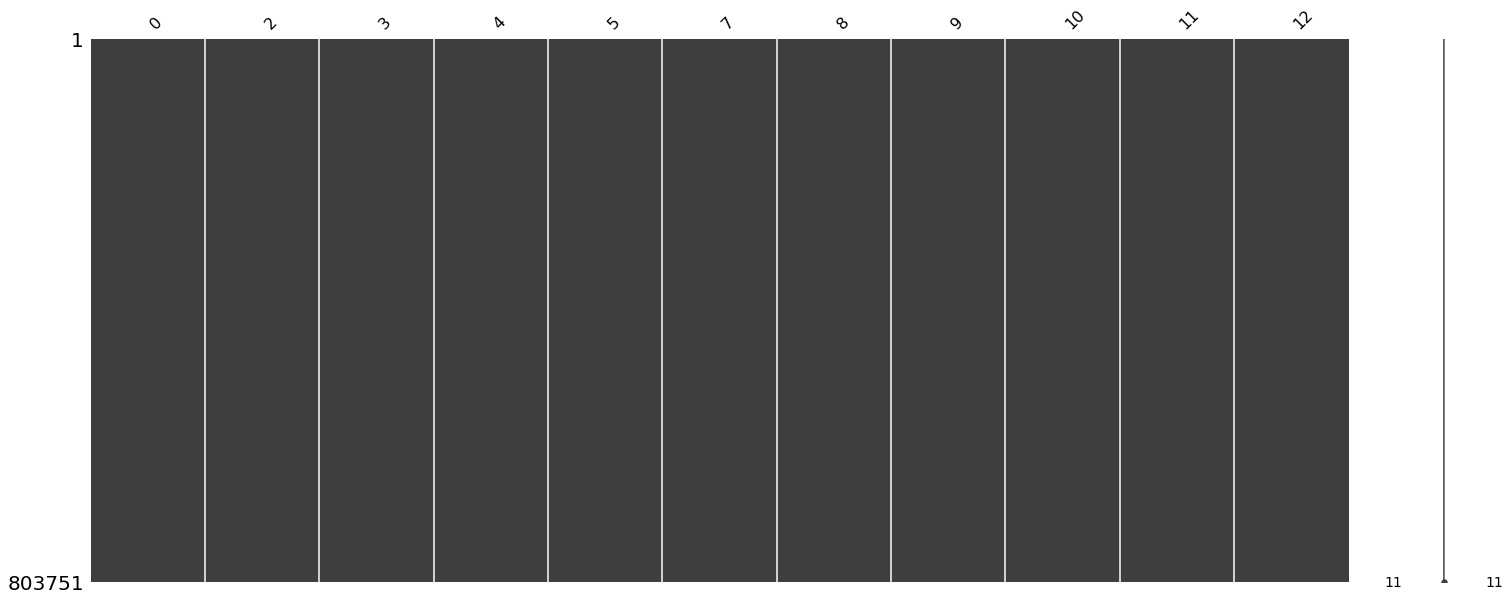

In [7]:
for c in df.columns:
    print('{} : {}'.format(c, len(df.loc[pd.isnull(df[c]),c].values)))
print(msno.matrix(df))

In [8]:
x_train, x_test,y_train, y_test = train_test_split(df, y, test_size=0.01, random_state=seed)

In [9]:
model = Sequential()
model.add(Dense(240, input_dim=11, activation='relu'))
model.add(Dense(720, activation='relu'))
model.add(Dense(1440, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# print(x_train.tail())
# print(y_train.tail())
# print(x_test.tail())
# print(y_test.tail())

In [11]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [13]:
# 모델 실행 및 저장
history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=1500)

Instructions for updating:
Use tf.cast instead.
Train on 533127 samples, validate on 262586 samples
Epoch 1/100
533127/533127 [==============================] - 16s 29us/step - loss: 1652221217.5347 - acc: 1.8757e-06 - val_loss: 1228596566.5923 - val_acc: 0.0000e+00
Epoch 2/100
533127/533127 [==============================] - 13s 25us/step - loss: 1225754169.8038 - acc: 1.8757e-06 - val_loss: 1229800746.3709 - val_acc: 0.0000e+00
Epoch 3/100
533127/533127 [==============================] - 13s 24us/step - loss: 1226095414.7217 - acc: 1.1254e-05 - val_loss: 1229267907.5000 - val_acc: 0.0000e+00
Epoch 4/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226163636.7402 - acc: 2.0633e-05 - val_loss: 1229074354.4028 - val_acc: 0.0000e+00
Epoch 5/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226133570.8311 - acc: 1.8757e-06 - val_loss: 1228600111.0774 - val_acc: 0.0000e+00
Epoch 6/100
533127/533127 [==============================] - 13s 

Epoch 48/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226451831.5951 - acc: 1.8757e-06 - val_loss: 1228996830.8040 - val_acc: 0.0000e+00
Epoch 49/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226807551.5498 - acc: 2.0633e-05 - val_loss: 1231681320.0024 - val_acc: 0.0000e+00
Epoch 50/100
533127/533127 [==============================] - 14s 25us/step - loss: 1226650626.8120 - acc: 5.6272e-06 - val_loss: 1232333259.6220 - val_acc: 0.0000e+00
Epoch 51/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226394480.2634 - acc: 1.8757e-06 - val_loss: 1231037568.9827 - val_acc: 0.0000e+00
Epoch 52/100
533127/533127 [==============================] - 13s 25us/step - loss: 1227258361.9381 - acc: 2.8136e-05 - val_loss: 1229010589.0862 - val_acc: 0.0000e+00
Epoch 53/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226706324.1113 - acc: 4.1266e-05 - val_loss: 1228609453.0695 - val_acc: 0.0

533127/533127 [==============================] - 13s 25us/step - loss: 1226373162.5937 - acc: 7.5029e-06 - val_loss: 1229018392.3608 - val_acc: 0.0000e+00
Epoch 97/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226333736.9817 - acc: 1.8757e-06 - val_loss: 1229929550.2899 - val_acc: 0.0000e+00
Epoch 98/100
533127/533127 [==============================] - 14s 25us/step - loss: 1226165494.1027 - acc: 0.0000e+00 - val_loss: 1230311718.7633 - val_acc: 0.0000e+00
Epoch 99/100
533127/533127 [==============================] - 14s 25us/step - loss: 1226229704.6214 - acc: 3.3763e-05 - val_loss: 1229099381.3924 - val_acc: 0.0000e+00
Epoch 100/100
533127/533127 [==============================] - 13s 25us/step - loss: 1226477038.9654 - acc: 3.7515e-06 - val_loss: 1229052239.7381 - val_acc: 0.0000e+00


In [14]:
# model.fit(x_train, y_train, epochs=100, batch_size=100)

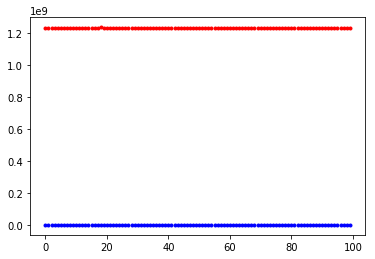

In [15]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파랑색으로, 오차를 빨강색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

batch size 10으로 했을 때, 02:31 ~ 07:31 까지 100 epoch 학습함 / 하나당 3분

학습 크기: 493205

근데 2번이랑 100번이랑 loss변화가 없음

* DROP OUT 추가해서 성능 비교 해봐야함
* keras.optimizer.SGD(lr=0.1) 확률적 경사 하강법 learning rate 조절하는 코드
(lr=0.1, momentum=0.9,nestrove=True) 모멘텀을 추가하기도 함 / 한 단계 미리가서 거기서 경사 계산

업데이트 횟수 따라서 더 세밀하게 할지, 더 폭을 넓힐지를 결정함 / 무한대로 커지는거 방지하는것도 있음

최종 아담 코드: keras.optimzers.Adagrad(lr=0.01, epslison=1e-08, decay=0.0 (두 가지 장점 다 취함)

### first try
* LAYER(8,39,24,6,1)
* batch size 100
* learning time per epochs: 20s
* loss: 316,141,761 -> 133,509 꾸준히 줄어듬
* RMSE = <b>393.87</b> (19-04-07)

### second try - add more layers

* LAYER(8,80,160,40,20,5,1)
* batch size 100
* learning time per epochs: 30s
* loss: 107,684,961 -> 86,265 꾸준히 줄어듬, 근데 튀는 범위가 커짐
* RMSE = <b>170.43</b> (19-04-07)

### third try - add dropout(0.5) after input

* LAYER(8,80,dropout(0.5),160,40,20,5,1)
* batch size 100
* learning time per epochs: 25s
* loss: 234,290,290 -> 1,531,823 안 쓰는게 좋은듯  / 100일때 loss :3,629,611
* RMSE = <b>34259.49</b> (19-04-07)

dropout을 20과 5 사이로 옮긴결과 - epoch 100 batch 100일때 loss = 44,634,468 / rmse=33465.05

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error

modelPred = model.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

33962.15001061766

## 그림그리려고 만듦 
alidation_split=0.33, epochs=50, batch_size=500

조건 위랑 같음 - loss 217190813 / rmse 33871

87198.6413
74763710.7422   

뭔가 잘못됨, RMSE 33962
앞에 지역명 잘라내고, validation split이 잘못된건가
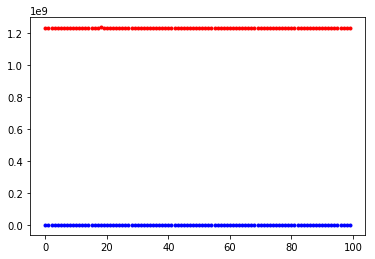